Monte Carlo Integration

In [115]:
import numpy as np
import matplotlib.pyplot as plt

import scipy

In [385]:
# Task 1 & 2(a to c)

def f_1(x):
    return 2

def f_2(x):
    return -x

def f_3(x):
    return x**2

def uni_mc_integration(f, a, b, n):

    vals = np.random.uniform(a, b, n)
    y = [f(val) for val in vals]
    y_mean = np.sum(y)/n

    ans = (b-a) * y_mean
    err = 1/n*( np.sum(np.square(y)/n) - y_mean**2 )
    
    return ans, err

x_1 = uni_mc_integration(f_1,  0, 1, 250000)
x_2 = uni_mc_integration(f_2,  0, 1, 250000)
x_3 = uni_mc_integration(f_3, -2, 2, 250000)

print(x_1,x_2,x_3)

(2.0, 7.105427357601002e-21) (-0.49968351078515, 3.334840008257038e-07) (5.341389515554828, 5.698654982942696e-06)


In [386]:
# Task 2 d

def f_4(x, y):
    return x*y + x

def bi_mc_integration(f, a, b, n):

    vals_x = np.random.uniform(a, b, n)
    vals_y = np.random.uniform(a, b, n)
    y = [f(vals_x, vals_y) for val in (vals_x, vals_y)]
    
    y_mean = (np.sum(y[0])/n+np.sum(y[1])/n)/2

    ans = (b-a)*(b-a) * y_mean
    
    # need to update error estimation for 2d
    err = 1/n*( np.sum(np.square(y)/n) - y_mean**2 )

    return ans, err

x_4 =  bi_mc_integration(f_4,  0, 1, 100000)
print(x_4)

(0.7485643050181763, 9.901925358089801e-06)


In [396]:
# stuff to make figure

f1_convergence, f2_convergence, f3_convergence, f4_convergence = np.array([]), np.array([]), np.array([]), np.array([])

for i in range(1,1000,1):
    x1_a, x1_e = uni_mc_integration(f_1, 0, 1, i) 
    f1_convergence = np.append(f1_convergence, x1_a)
    x2_a, x2_e = uni_mc_integration(f_2,  0, 1, i)
    f2_convergence = np.append(f2_convergence, x2_a)
    x3_a, x3e = uni_mc_integration(f_3, -2, 2, i)
    f3_convergence = np.append(f3_convergence, x3_a)
    x4_a, x4e = bi_mc_integration(f_4,  0, 1, i)
    f4_convergence = np.append(f4_convergence, x4_a)

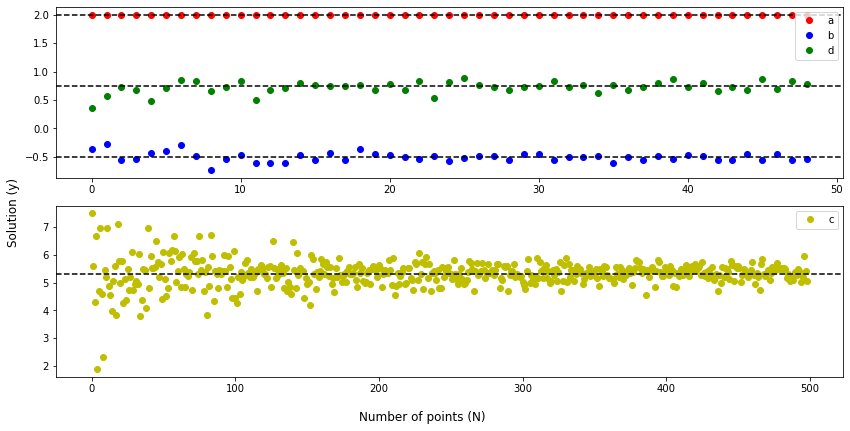

In [450]:
# plotting figure

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12,6))
fig.set_tight_layout(10)
ax0.plot(f1_convergence[1:50],'ro', label='a')
ax0.axhline(y=2, color='black',linestyle='--')
ax0.plot(f2_convergence[1:50],'bo', label='b')
ax0.axhline(y=-0.5, color='black',linestyle='--')
ax0.plot(f4_convergence[1:50],'go', label='d')
ax0.axhline(y=0.75, color='black',linestyle='--')
ax0.legend()
ax1.plot(f3_convergence[1:500],'yo', label='c')
ax1.axhline(y=5.3, color='black',linestyle='--')
ax1.legend()
fig.supxlabel('Number of points (N)')
fig.supylabel('Solution (y)')

plt.savefig('report/images/q-2.png', bbox_inches='tight', dpi= 300)

In [452]:
# Task 3

def n_sphere_vol(r, ndim, n):
    hits = 0 
    
    for counter in range (n):
        hit = np.random.uniform(-r, r, ndim)
        position = np.linalg.norm(hit)
        if position < r:
            hits += 1

    return np.power(r*2.0, ndim) * (hits/n)

print(n_sphere_vol(2.0, 3, 100000))
print(n_sphere_vol(2.0, 5, 100000))

33.44256
167.3728


In [519]:
# Task 5

# code does not work as required but to see 
# the extent to which it works for the sampling requirements
# uncomment the respective p(x) 

def t5_a(x):
    return 2*np.e**(-x**2)

def t5_b(x):
    return 1.5*np.sin(x)

def intfunc(x):
    return x+7

def p(x):
    return np.e**(-np.absolute(x))

#def p(x):
#    return (4/np.pi**2)*(np.pi-x)

def metro(n, a, b):
    x_i = np.mean([p(a),p(b)]) 
    print(x_i)
    randoms = []
    
    for i in range(n):
        x_t = x_i + np.random.uniform(a*0.1,b*0.1)
        w = p(x_t)/p(x_i)
        if w >= 1:
            x_i = x_t
            randoms.append(x_i)
        else:
            r = np.random.uniform(0,1)
            if r <= w:
                x_i = x_t
                randoms.append(x_i)
            else:
                x_t = x_i
    
    return randoms


4.5399929762484875e-05


(array([  2.,   0.,   1.,   1.,   2.,   1.,   2.,   1.,   1.,   3.,   9.,
          1.,   1.,  10.,   8.,  11.,  15.,  26.,  21.,  21.,  19.,  32.,
         40.,  43.,  39.,  57.,  64.,  73.,  88., 108., 118., 157., 190.,
        185., 212., 260., 276., 327., 361., 394., 422., 441., 426., 422.,
        398., 338., 280., 255., 212., 186., 163., 130., 118.,  98., 101.,
         93.,  64.,  55.,  67.,  46.,  36.,  35.,  36.,  19.,  32.,  14.,
         19.,  16.,  17.,   9.,  11.,   7.,   9.,   8.,   5.,   6.,   4.,
          5.,   7.,   2.,   3.,   4.,   2.,   6.,   6.,   9.,   2.,   2.,
          6.,   0.,   3.,   5.,   6.,   2.,   1.,   1.,   3.,   1.,   1.,
          1.]),
 array([-5.7811281 , -5.64119239, -5.50125668, -5.36132096, -5.22138525,
        -5.08144954, -4.94151383, -4.80157812, -4.66164241, -4.52170669,
        -4.38177098, -4.24183527, -4.10189956, -3.96196385, -3.82202814,
        -3.68209243, -3.54215671, -3.402221  , -3.26228529, -3.12234958,
        -2.98241387, -2.84

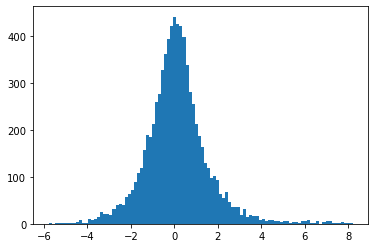

In [520]:
plt.figure()
plt.hist(metro(10000, -10, 10),bins=100)
#plt.savefig('report/images/q-5a.png', bbox_inches='tight', dpi= 300)

#plt.figure()
#plt.hist(metro(10000, 0, np.pi),bins=100)
#plt.savefig('report/images/q-5b.png', bbox_inches='tight', dpi= 300)

In [521]:
# seems to work for simple linear 
# functions like f(x) = x + 7 ; f(x) = 2x etc

def uni_mc_integration_metropolis(f, a, b, n = 10000):

    vals = metro(n, a, b)
    y = [f(val) for val in vals]
    y_mean = np.sum(y)/len(vals)

    ans = (b-a) * y_mean
    #ans = y_mean
    err = 1/n*( np.sum(np.square(y)/n) - y_mean**2 )
    
    return ans, err

In [522]:
# solution to f(x) = x + 7 using bad metropolis implementation 

print(uni_mc_integration_metropolis(intfunc, -10, 10, n = 100000))

4.5399929762484875e-05
(140.3540877968348, -8.802174117365269e-05)


In [526]:
#Task 6 

t6a_ans, t6a_err = uni_mc_integration(t5_a, -10, 10, 10000)
t6b_ans, t6b_err = uni_mc_integration(t5_b, 0, np.pi, 10000)

print('Task 6 Answer, Error')
print(t6a_ans, t6a_err)
print(t6b_ans, t6b_err)

Task 6 Answer, Error
3.5360517712507966 2.200719933660634e-05
2.999475207070458 2.1589231262300135e-05


In [542]:
f5a_convergence, f5b_convergence = np.array([]), np.array([])

for i in range(1,50000,100):
    x5a_a, x5a_e = uni_mc_integration(t5_a, -10, 10, i) 
    f5a_convergence = np.append(f5a_convergence, x5a_a)
    x5b_a, x5b_e = uni_mc_integration(t5_b,  0, np.pi, i)
    f5b_convergence = np.append(f5b_convergence, x5b_a)

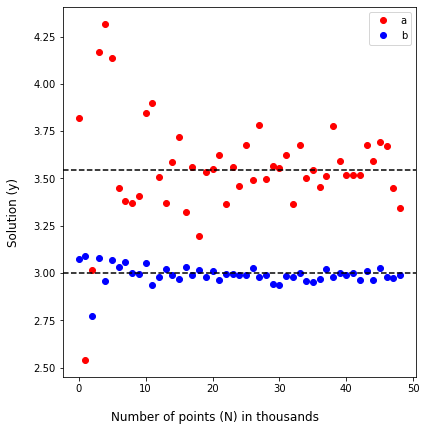

In [550]:
x = np.linspace(1,50000,49)

fig, (ax0) = plt.subplots(1, 1, figsize=(6,6))
fig.set_tight_layout(10)
ax0.plot(f5a_convergence[1:50],'ro', label='a')
ax0.axhline(y=3.545, color='black',linestyle='--')
ax0.plot(f5b_convergence[1:50],'bo', label='b')
ax0.axhline(y=3, color='black',linestyle='--')
ax0.legend()
fig.supxlabel('Number of points (N) in thousands')
fig.supylabel('Solution (y)')

plt.savefig('report/images/q-6.png', bbox_inches='tight', dpi= 300)

### Code below is just junk, incase i want to try this again

22026.465794806703


/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_75970/651379891.py:5: RuntimeWarning: overflow encountered in double_scalars
  return np.e**(np.absolute(-x))
/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_75970/651379891.py:14: RuntimeWarning: invalid value encountered in double_scalars
  w = p(x_t)/p(x_i)


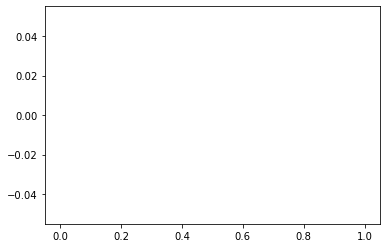

In [504]:
hist_plot(metro(10000,-10,10))

In [470]:
def uni_mc_integration_metropolis_b(f, a, b, n = 100000):

    vals = metropolis(n)
    plt.hist(vals, bins=100)
    #y = [f(val)*p(val) for val in vals]
    #y_d = [[p](val) for val in vals]
    #y_mean_num = [q(vals)*f(vals)]
    #y_mean_den = q(vals)
    #y_mean = np.average(y)
    
    ans = (b-a) * y_mean
    #ans = y_mean
    err = 1/n*( np.sum(np.square(y)/n) - y_mean**2 )
    
    return #y_mean, err

In [471]:
uni_mc_integration_metropolis_b(t5_a, -10, 10, n = 100000)

UnboundLocalError: local variable 'p' referenced before assignment

In [507]:
uni_mc_integration_metropolis_b(t5_b, 0, np.pi, n = 100000)

TypeError: metropolis() missing 3 required positional arguments: 'a', 'b', and 'delta'